In [73]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [81]:
# Analyze test results
results_dir = './results/'

df_preds1 = pd.read_csv(results_dir + 'predictions_1.csv')
df_targets1 = pd.read_csv(results_dir + 'targets_1.csv')[::10]

df_preds2 = pd.read_csv(results_dir + 'predictions_2.csv')
df_targets2 = pd.read_csv(results_dir + 'targets_2.csv')[::10]

df_preds1_avg = df_preds1.groupby(np.arange(len(df_preds1)) // 10).mean()
df_preds2_avg = df_preds2.groupby(np.arange(len(df_preds2)) // 10).mean()


thresh = np.arange(0, 1, 0.005)

TPR = np.zeros((len(thresh), len(df_preds1.columns)))
FPR = np.zeros((len(thresh), len(df_preds1.columns)))

TNR = np.zeros((len(thresh), len(df_preds1.columns)))
FNR = np.zeros((len(thresh), len(df_preds1.columns)))
for i in range(len(thresh)):
    preds1 = (df_preds1_avg > thresh[i]).astype('int')
    # print(preds1)

    TPR[i] = preds1[df_targets1 == 1].sum(axis=0)/df_targets1.sum(axis=0)
    FPR[i] = preds1[df_targets1 == 0].sum(axis=0)/(1 - df_targets1).sum(axis=0)

    TNR[i] = (1 - preds1[df_targets1 == 0]).sum(axis=0)/(1 - df_targets1).sum(axis=0)
    FNR[i] = (1 - preds1[df_targets1 == 1]).sum(axis=0)/df_targets1.sum(axis=0)


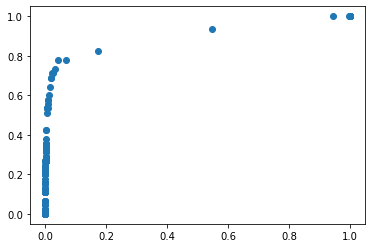

In [87]:
plt.figure()
plt.scatter(FPR[:, 2], TPR[:, 2])
plt.show()

In [84]:
TPR[100]

array([0.        , 0.        , 0.15555556, 0.07142857, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.16666667,
       0.        , 0.4185022 , 0.        , 0.        , 0.        ,
       0.02040816, 0.15384615, 0.        , 0.        , 0.        ,
       0.4040404 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.25      , 0.        , 0.        ,
       0.        , 0.05963303, 0.        , 0.125     , 0.        ,
       0.        , 0.        ])

In [85]:
FPR[100]

array([0.00104822, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.000999  ,
       0.        , 0.21075903, 0.00050684, 0.        , 0.        ,
       0.        , 0.00382514, 0.        , 0.        , 0.        ,
       0.0132108 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00147783, 0.        , 0.        ,
       0.        , 0.0021978 , 0.        , 0.        , 0.        ,
       0.        , 0.        ])